## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Wednesday, 9th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

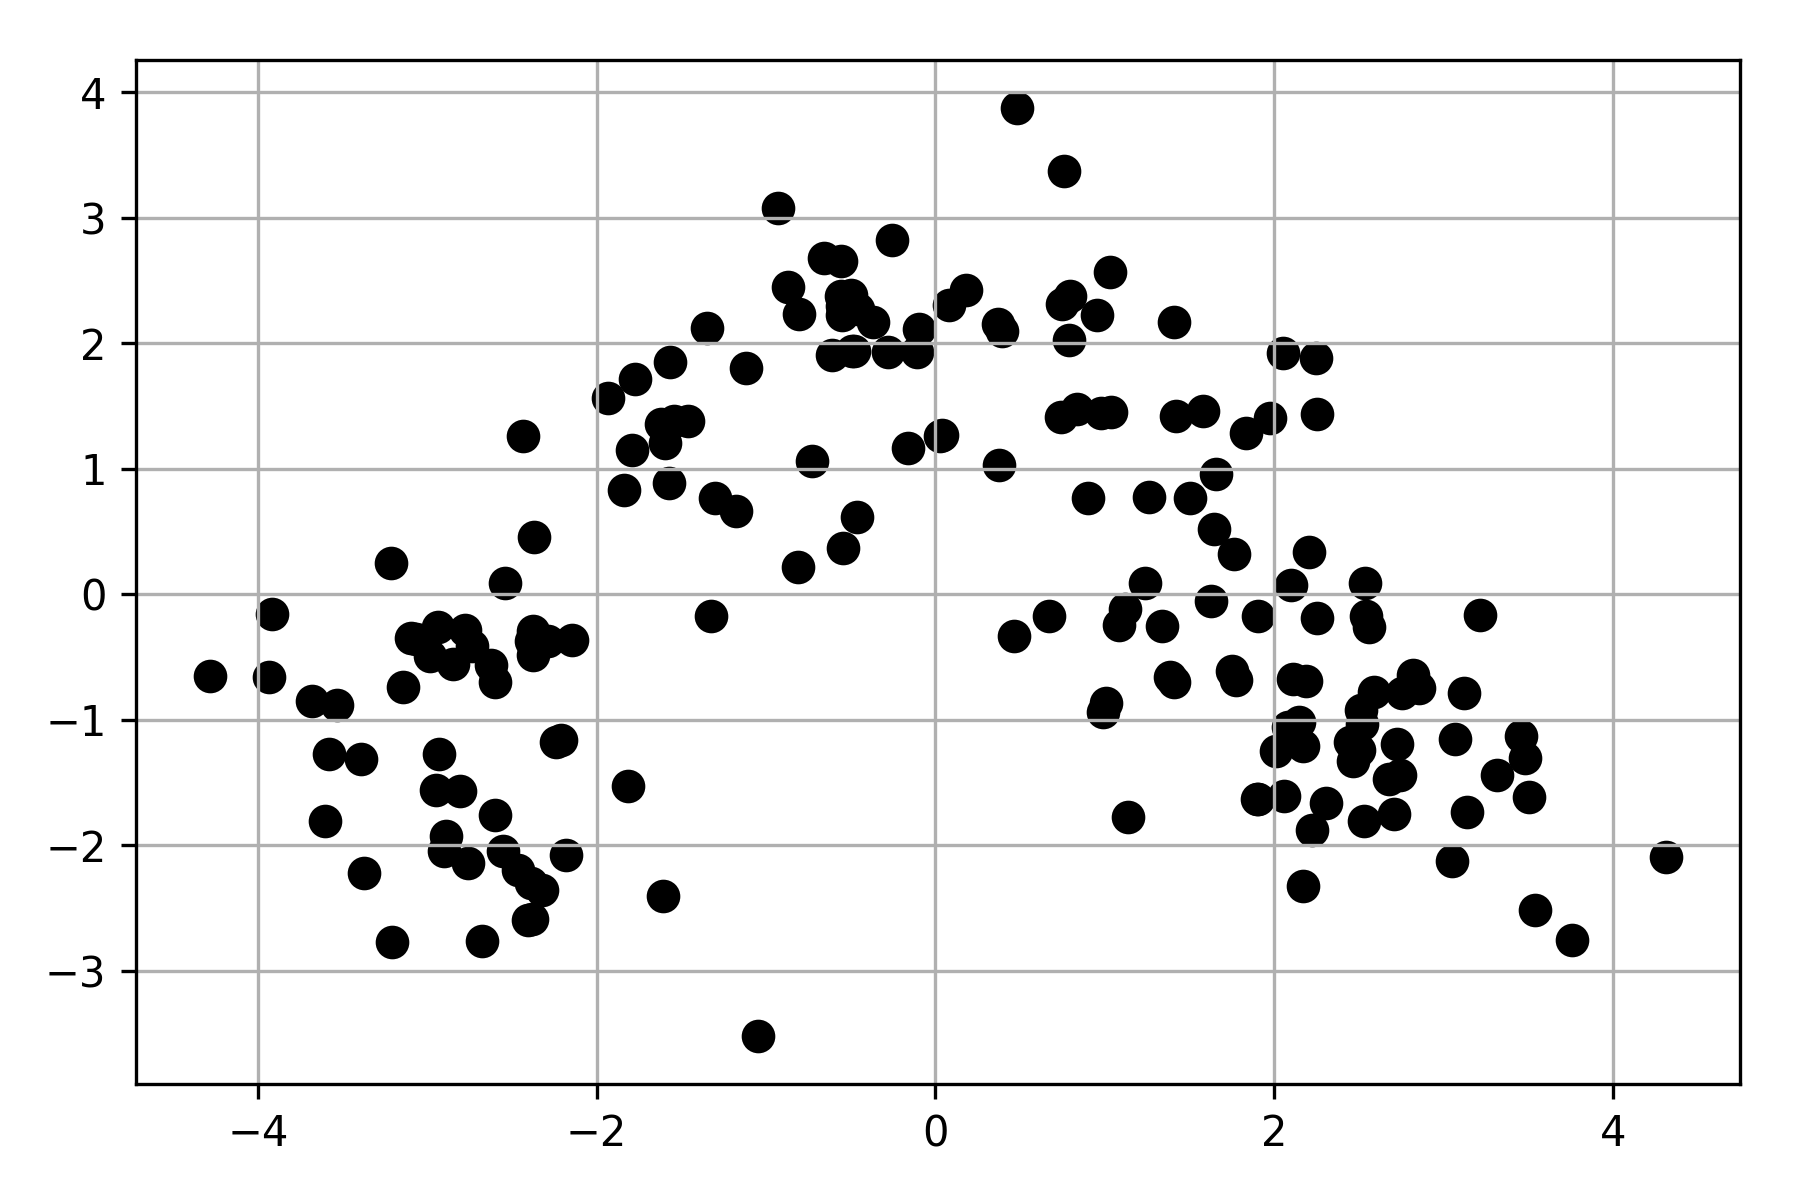

In [35]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

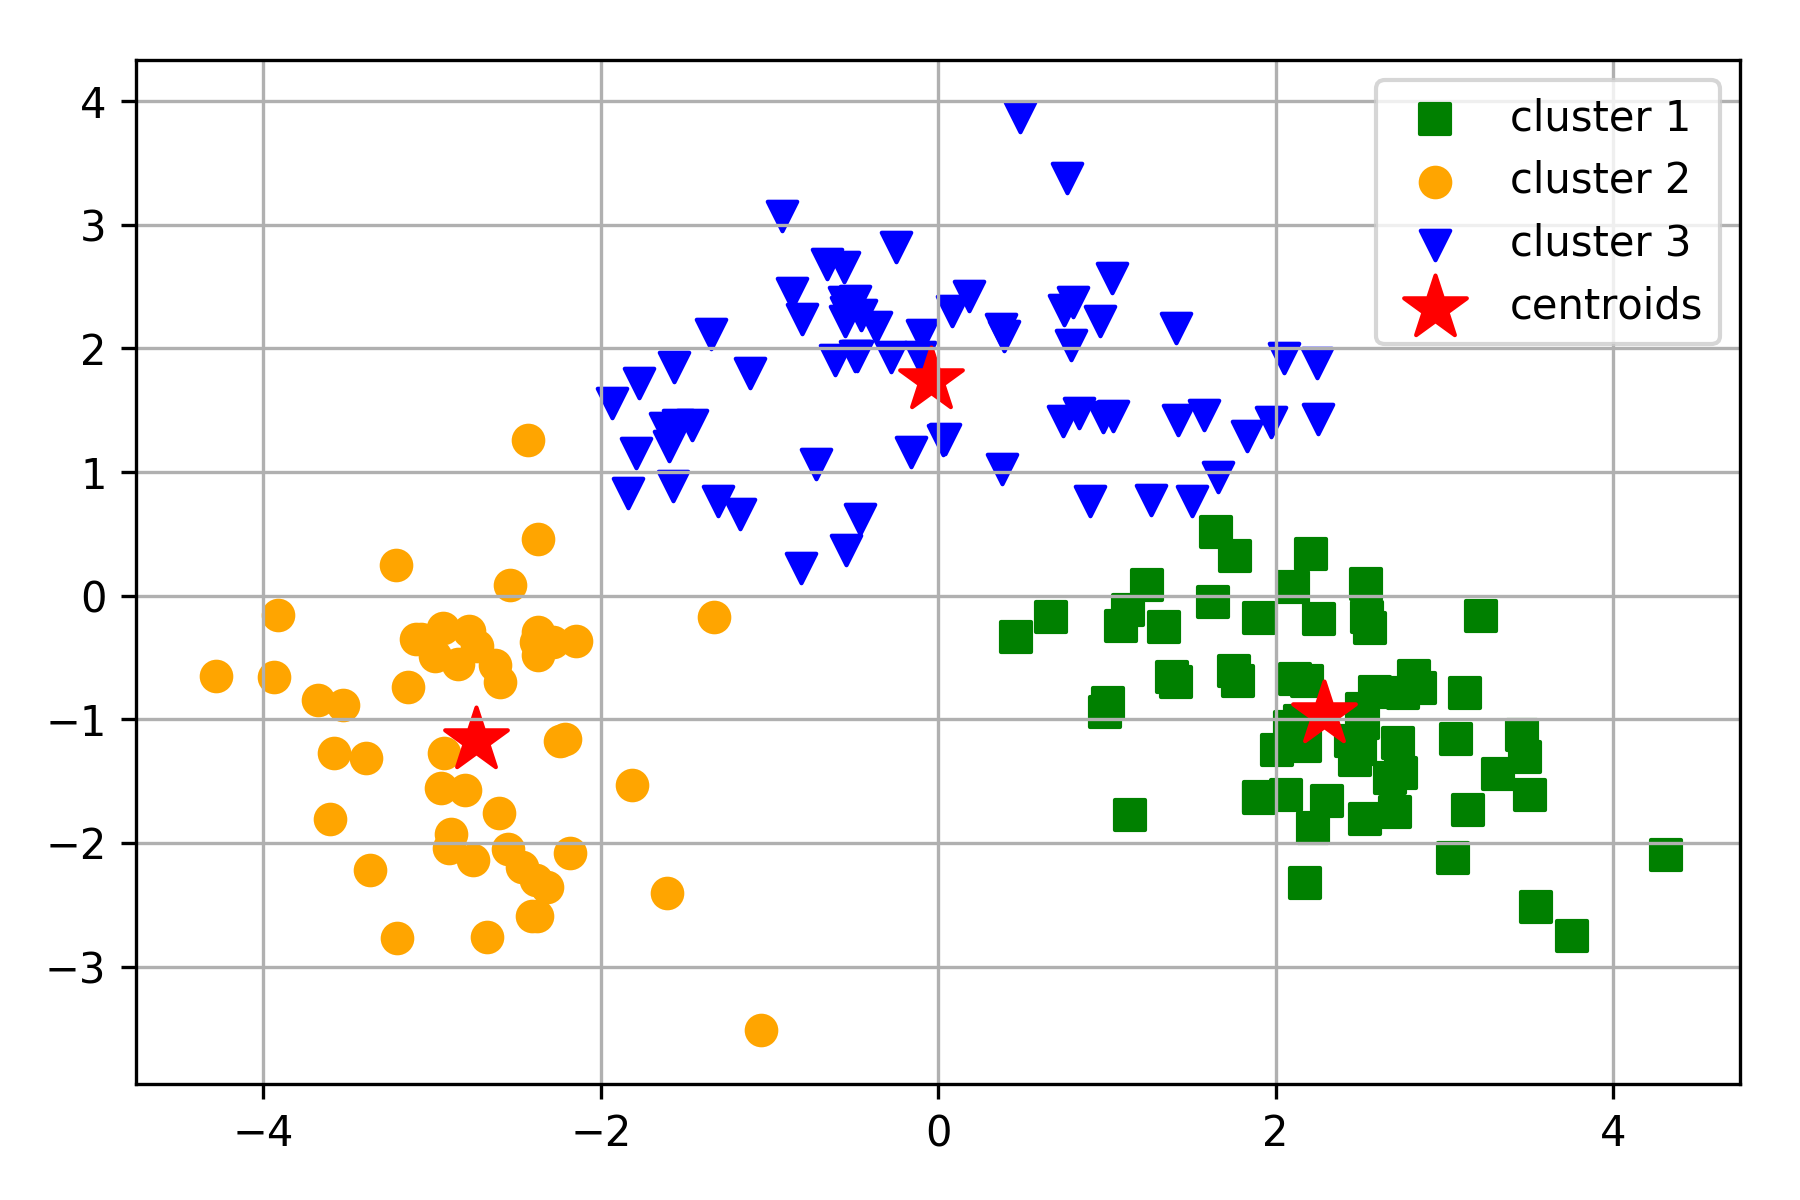

In [36]:
Image(filename=r'centroids.png')

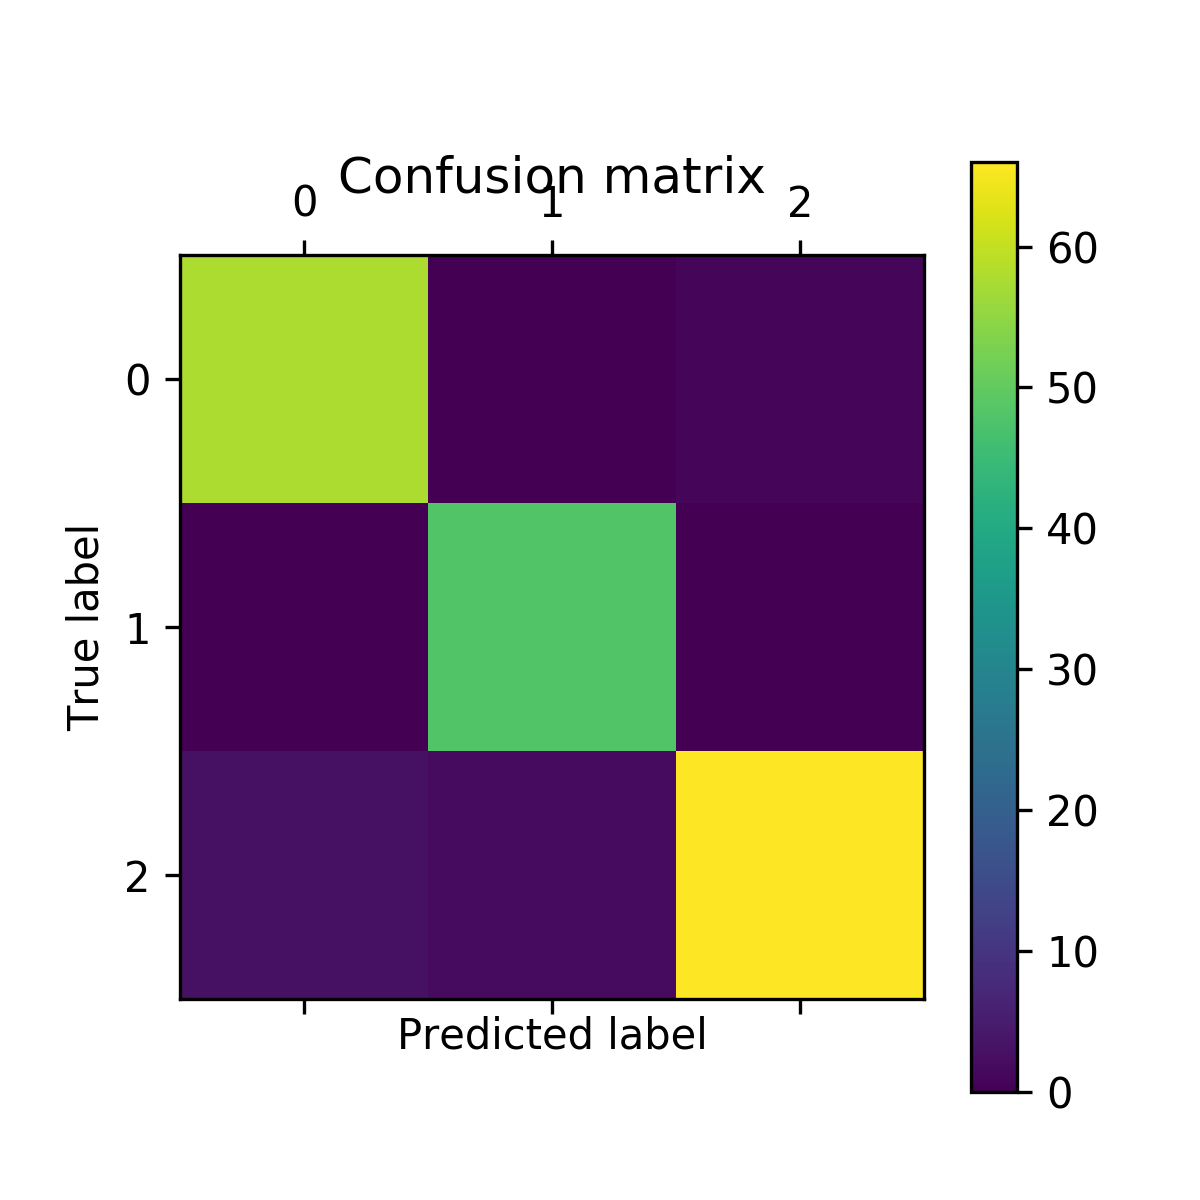

In [37]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

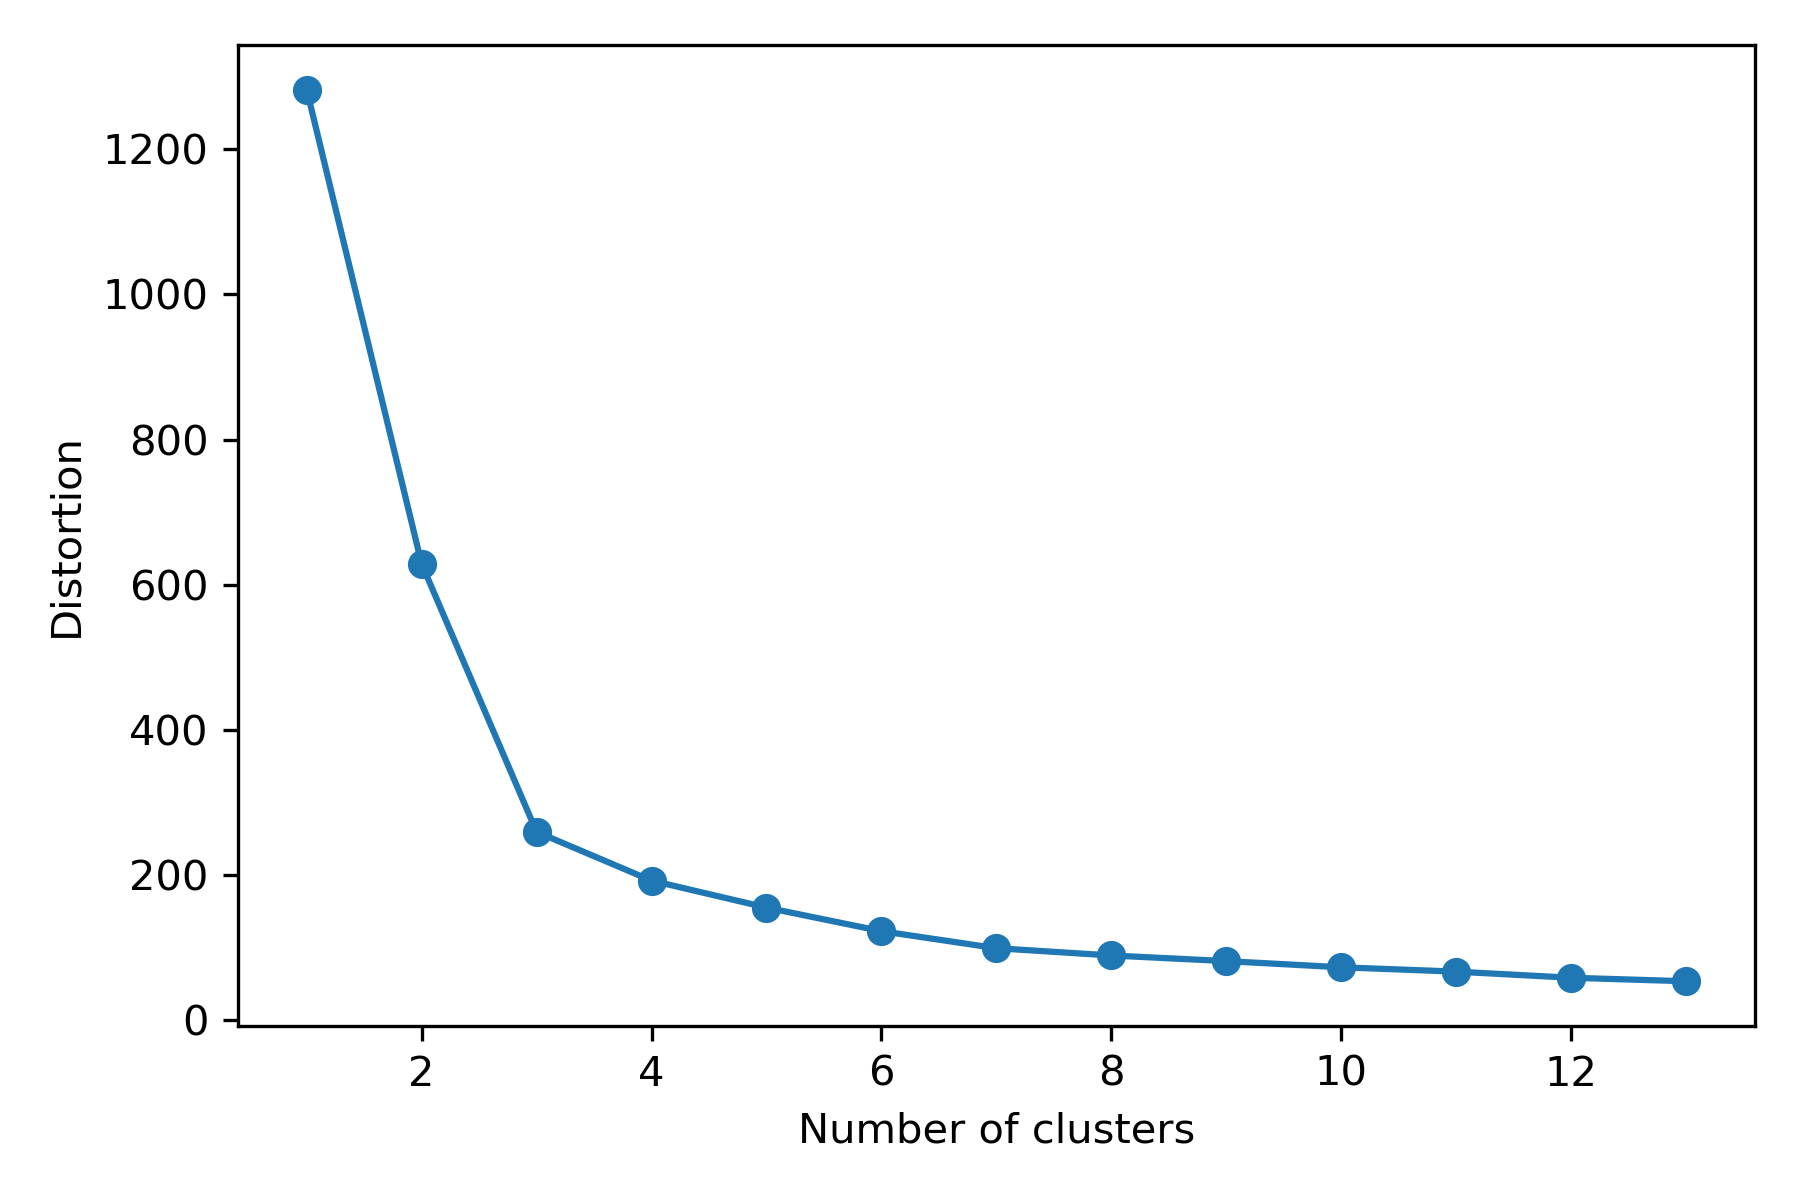

In [38]:
Image(filename=r'elbow.png')

# Task 1

In [39]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

## your code here

In [40]:
X, y = df_wine.iloc[:, 1:14].values, df_wine.iloc[:, 0].map(lambda v: v-1).values
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [41]:
pca = PCA(n_components=2)
pcadata = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [42]:
pca_df = pd.DataFrame(data = pcadata, columns = ['PCA1','PCA2'])

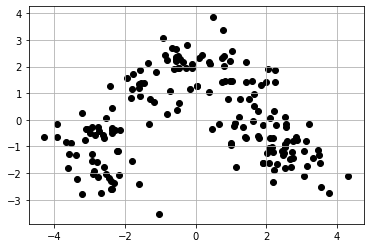

In [43]:
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],c='black')
plt.grid()
plt.show()

## We can say this graph is roughly to be in cluster of three, one cluster is at left bottom, one is at right bottom and the the last one is at upper middle. 

# Task 2

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [45]:
kmeans = KMeans(n_clusters=3,random_state=0,init='random')
y1 = kmeans.fit_predict(pcadata)

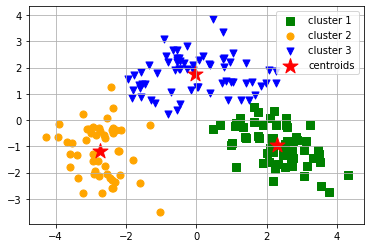

In [46]:
colors = ['g', 'orange','b']
markers = ['s', 'o', 'v']


plt.scatter(pcadata[y1 == 0, 0],
            pcadata[y1 == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(pcadata[y1 == 1, 0],
            pcadata[y1 == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(pcadata[y1 == 2, 0],
            pcadata[y1 == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.grid()  
plt.legend(loc='upper right')
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
y_pred = kmeans.predict(pcadata)
y_true = y

k_labels = kmeans.labels_
k_labels_matched = np.empty_like(k_labels)
for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
    k_labels_matched[k_labels==k] = np.unique(y)[np.argmax(match_nums)]
    
matrix = confusion_matrix(y_true, k_labels_matched)
matrix

array([[58,  1,  0],
       [ 3, 66,  2],
       [ 0,  0, 48]], dtype=int64)

In [48]:
print('The accuracy score is '+ str(accuracy_score(y_true,k_labels_matched)))

The accuracy score is 0.9662921348314607


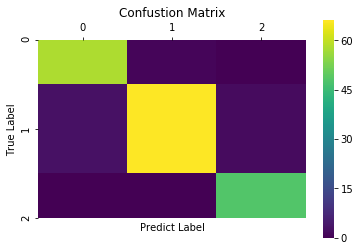

In [49]:
df_matrix = pd.DataFrame(matrix, range(3), range(3))
ax = sns.heatmap(df_matrix,cmap="viridis",square=True)
ax.xaxis.set_ticks_position('top')
ax.set_title('Confustion Matrix')
ax.set_xlabel('Predict Label')
ax.set_ylabel('True Label')
plt.show()

# Task 3

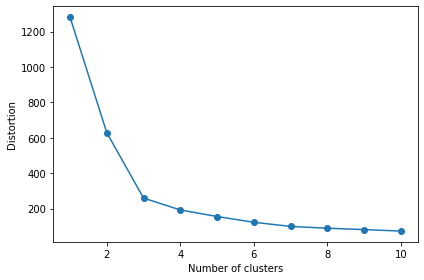

In [50]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(pcadata)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.savefig('elbow.png', dpi=300)
plt.show()